In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as de

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

In [2]:
main = 'C:/Users/noname/Desktop/wuzhatn'
raw = main + '/raw'
years = range(2011,2019,1)
y2u = range(2014,2019,1)

In [3]:
all_ds = {}
for y in years:
#     print('')
#     print(f'******************** {str(y)} ********************' )
#     all_ds = all_ds.append(pd.read_excel(raw + '/일별평균대기오염도_' + str(y) + '.xlsx'))
    all_ds[y] = pd.read_excel(raw + '/일별평균대기오염도_' + str(y) + '.xlsx', usecols=[0,1,6,7])
#     print(all_ds[y].shape)
    all_ds[y].dropna(axis=1, how='all', inplace=True)
#     print(all_ds[y].columns[all_ds[y].isnull().any()])
#     all_ds[y].dropna(axis=0, how='any', inplace=True)
#     print(all_ds[y].shape)
    

In [4]:
ds = pd.DataFrame()
for y in y2u:
    ds = ds.append(all_ds[y])

ds.columns = ['dt','loca','pm10','pm25']
ds['dt'] = pd.to_datetime(ds['dt'], format='%Y%m%d')

ds = ds[ds['loca'].str[-1]=='구']
ds.reset_index(inplace=True, drop=True)

print(ds.loca.unique())
print(ds.dt.min())
print(ds.dt.max())
print(ds.shape)
print(ds.loca.value_counts())
print(ds.loca.value_counts().shape)
print(type(ds.dt[1]))
ds.head()

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
2014-01-01 00:00:00
2018-12-31 00:00:00
(44157, 4)
서대문구    1770
강동구     1770
마포구     1770
용산구     1770
송파구     1770
광진구     1770
종로구     1770
강서구     1770
관악구     1770
동작구     1770
성북구     1770
은평구     1770
성동구     1770
동대문구    1770
강남구     1770
도봉구     1770
서초구     1770
구로구     1770
중구      1769
노원구     1768
중랑구     1767
영등포구    1767
강북구     1746
금천구     1741
양천구     1739
Name: loca, dtype: int64
(25,)
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,dt,loca,pm10,pm25
0,2014-01-01,강남구,117.0,29.0
1,2014-01-01,강동구,118.0,26.0
2,2014-01-01,강북구,117.0,21.0
3,2014-01-01,강서구,116.0,21.0
4,2014-01-01,관악구,124.0,26.0


In [5]:
locas = ds.loca.unique()

st = pd.to_datetime(f'{min(y2u)}0101',format='%Y%m%d')
ed = pd.to_datetime(f'{max(y2u)}1231',format='%Y%m%d')
dates = []
i = st
while i <= ed:
    dates.append(i)
    i += de.timedelta(days=1)
print(dates[-1])
print(len(dates))
print(locas)

denom = pd.DataFrame( [[x,y] for x in dates for y in locas], columns=['dt','loca'])
print(denom.shape)
print(type(denom.dt[0]))
print(ds.shape)
ds = denom.merge(ds, on=['dt','loca'], how='outer', validate='1:1')
print(ds.shape)

ds['day'] = (ds['dt'] - pd.to_datetime(ds['dt'].dt.year.astype(str)+'0101', format='%Y%m%d')).dt.days
ds['y'] = ds['dt'].dt.year
ds['m'] = ds['dt'].dt.month

ds.head()

2018-12-31 00:00:00
1826
['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
(45650, 2)
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(44157, 4)
(45650, 4)


,dt,loca,pm10,pm25,day,y,m
0,2014-01-01,강남구,117.0,29.0,0,2014,1
1,2014-01-01,강동구,118.0,26.0,0,2014,1
2,2014-01-01,강북구,117.0,21.0,0,2014,1
3,2014-01-01,강서구,116.0,21.0,0,2014,1
4,2014-01-01,관악구,124.0,26.0,0,2014,1


In [6]:
print(ds[(ds['dt'].dt.year==2018) & (ds['loca']=='강동구') & (ds['pm10'].isna()==True)].shape )
ds[(ds['dt'].dt.year==2018) & (ds['loca']=='강동구') & (ds['pm10'].isna()==True)].head()
ds.head()

(56, 7)


,dt,loca,pm10,pm25,day,y,m
0,2014-01-01,강남구,117.0,29.0,0,2014,1
1,2014-01-01,강동구,118.0,26.0,0,2014,1
2,2014-01-01,강북구,117.0,21.0,0,2014,1
3,2014-01-01,강서구,116.0,21.0,0,2014,1
4,2014-01-01,관악구,124.0,26.0,0,2014,1


In [19]:
# collapse at month level
mgb = ds[['loca','pm10','pm25','y','m']].groupby(['loca','y','m']).agg(['mean','min','max'])
mgb.columns = pd.Index(i[0]+'_'+i[1] for i in mgb.columns.tolist())
mgb.reset_index(inplace=True)
mgb.head(15)

,loca,y,m,pm10_mean,pm10_min,pm10_max,pm25_mean,pm25_min,pm25_max
0,강남구,2014,1,58.258065,20.0,117.0,33.258065,8.0,72.0
1,강남구,2014,2,57.178571,9.0,169.0,34.928571,6.0,104.0
2,강남구,2014,3,64.032258,30.0,134.0,33.129032,14.0,60.0
3,강남구,2014,4,59.833333,12.0,155.0,33.100000,7.0,83.0
4,강남구,2014,5,63.419355,26.0,166.0,30.709677,15.0,60.0
5,강남구,2014,6,38.600000,20.0,86.0,24.000000,11.0,49.0
6,강남구,2014,7,38.290323,11.0,83.0,25.709677,7.0,56.0
7,강남구,2014,8,29.451613,9.0,74.0,18.677419,4.0,49.0
8,강남구,2014,9,28.300000,7.0,47.0,17.200000,4.0,33.0
9,강남구,2014,10,33.000000,11.0,61.0,18.354839,8.0,31.0


In [148]:
meas_dict = {}
for v in ['pm10','pm25']:
    meas_dict[v] = {}
    for meas in ['mean','min','max']:
        meas_dict[v][meas] = {}
        for m in range(1,13):
            t = [] 
            for y in y2u:
                t.append(float(mgb.loc[(mgb['loca']=='강남구') & (mgb['m']==m) & (mgb['y']==y), \
                                       v+'_'+meas]))
            meas_dict[v][meas][m] = t
# print(meas_dict)

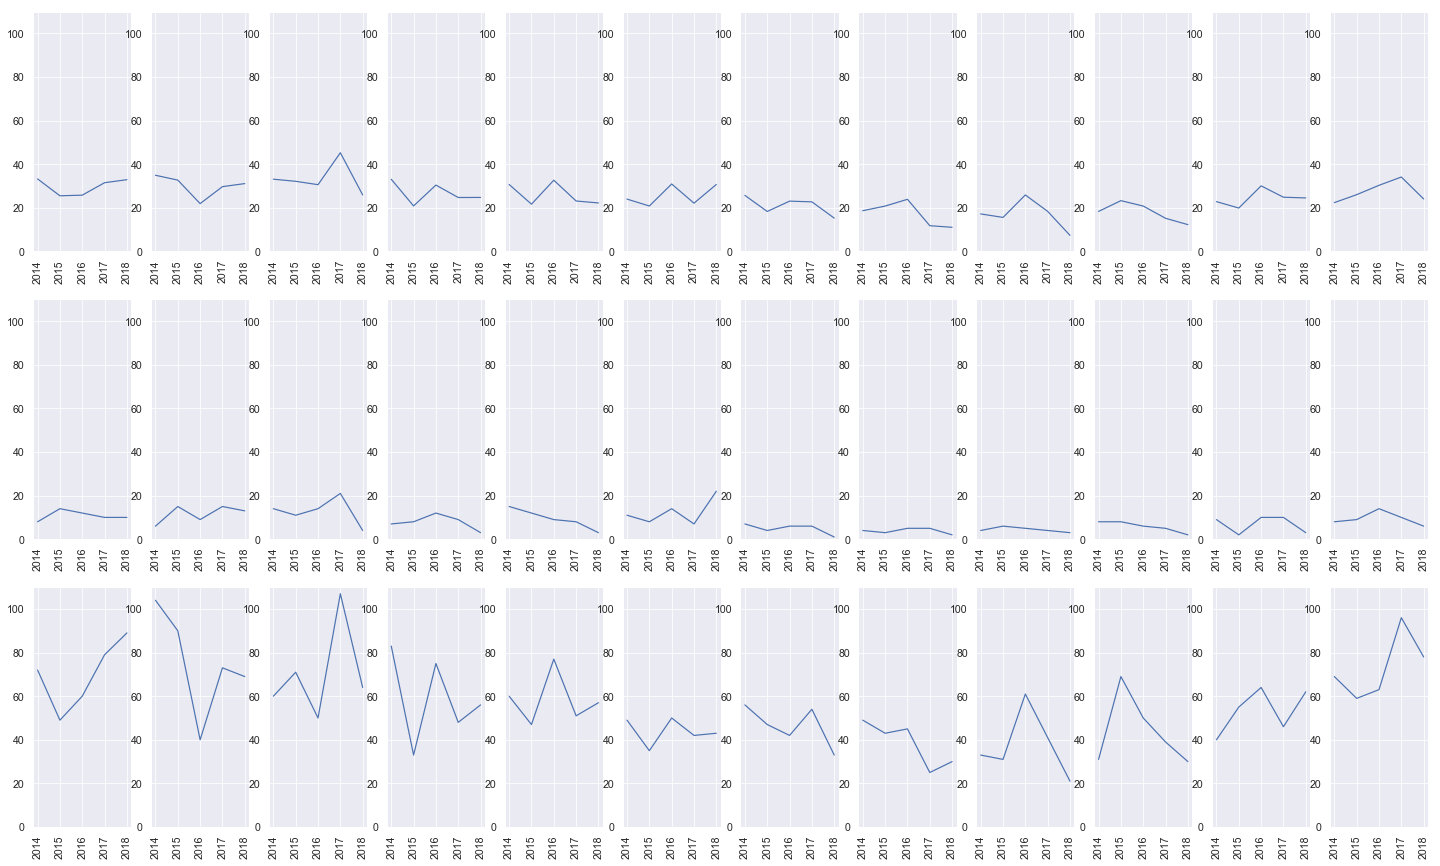

In [147]:
# plt.subplots(figsize=(25,5))
pm = 'pm25'

plt.subplots(nrows=3, ncols=12, sharex='col', figsize=(25,15))
r = 1
i = 1
for which in ['mean','min','max']:
    for k,v in meas_dict[pm][which].items():
        plt.subplot(3,12,i)
        plt.plot(list(y2u), v)
        plt.ylim(0,mgb[pm+'_max'].max())
        plt.xticks(list(y2u), rotation=90)
        i += 1
    r += 1

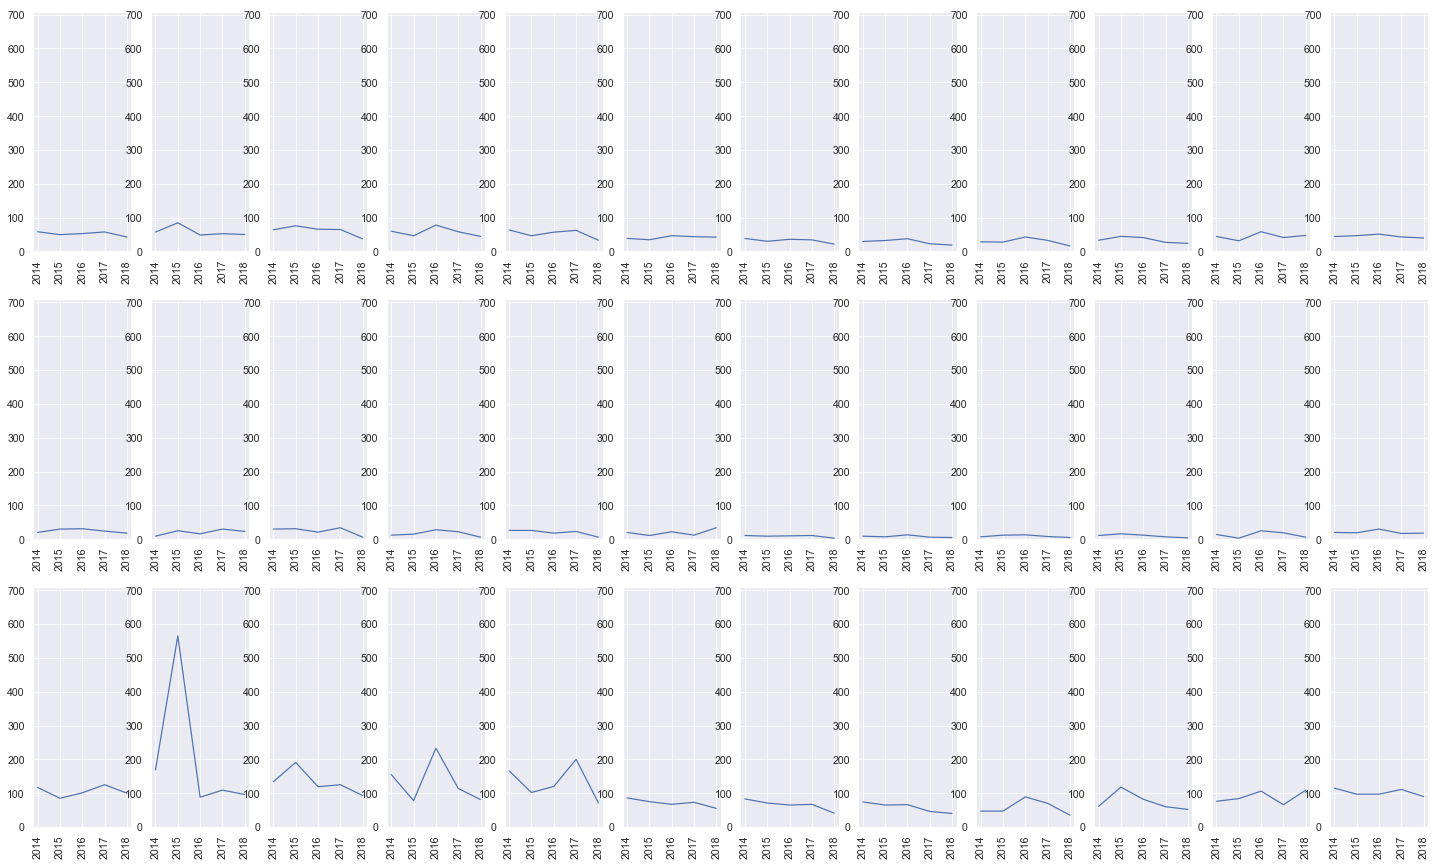

In [149]:
# plt.subplots(figsize=(25,5))
pm = 'pm10'
plt.subplots(nrows=3, ncols=12, sharex='col', figsize=(25,15))
r = 1
i = 1
for which in ['mean','min','max']:
    for k,v in meas_dict[pm][which].items():
        plt.subplot(3,12,i)
        plt.plot(list(y2u), v)
        plt.ylim(0,mgb[pm+'_max'].max())
        plt.xticks(list(y2u), rotation=90)
        i += 1
    r += 1

range(2014, 2019)


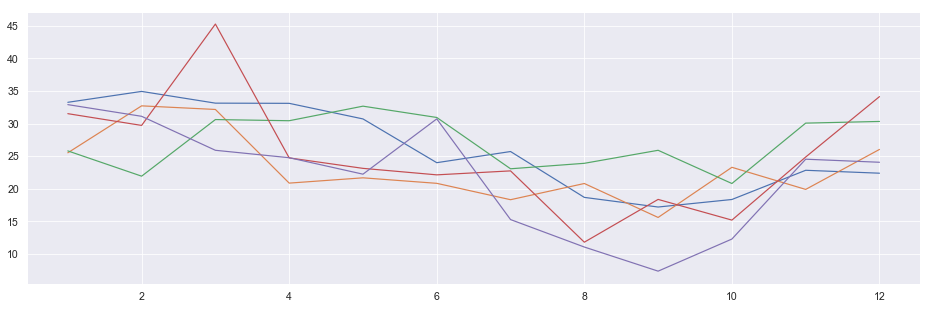

In [64]:
print(y2u)
plt.subplots(figsize=(16,5))
# plt.xticks(ds.loc[(ds['dt'].dt.year==2015) & (ds['loca']=='강남구'),'dt'].tolist(), rotation=90)
for yee in y2u:
    plt.plot(mgb.loc[(mgb['y']==yee) & (mgb['loca']=='강남구'),'m'],\
             mgb.loc[(mgb['y']==yee) & (mgb['loca']=='강남구'),'pm25_mean'])
    
    

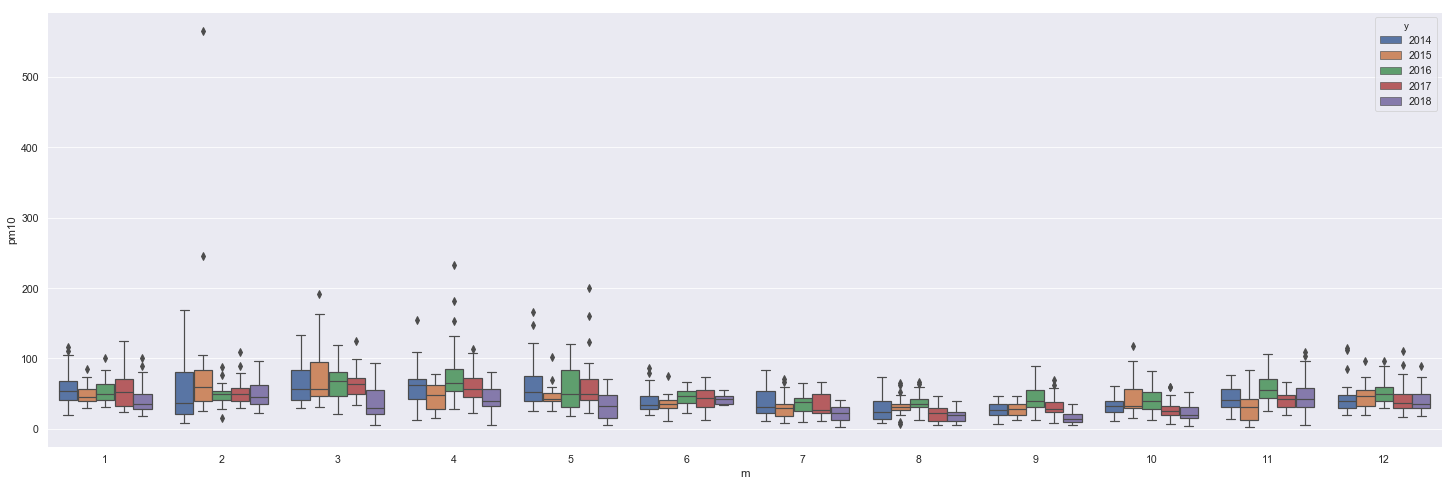

In [67]:
plt.subplots(figsize=(25,8))
b = sns.boxplot(data = ds[(ds['loca']=='강남구')],
                hue = 'y',
                x = 'm',
                y = 'pm10'                )

In [ ]:
med_dict = {}
min_dict = {}
max_dict = {}



<class 'pandas._libs.tslibs.timestamps.Timestamp'>


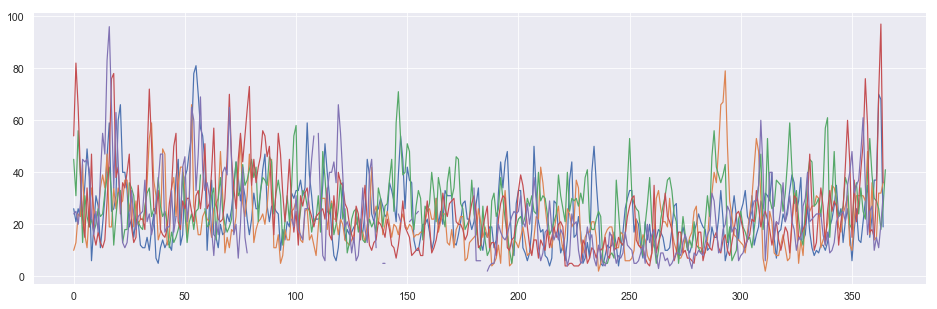

In [63]:
print(type(ds.dt[0]))
plt.subplots(figsize=(16,5))
# plt.xticks(ds.loc[(ds['dt'].dt.year==2015) & (ds['loca']=='강남구'),'dt'].tolist(), rotation=90)
for yee in y2u:
    plt.plot(ds.loc[(ds['dt'].dt.year==yee) & (ds['loca']=='강동구'),'day'],\
             ds.loc[(ds['dt'].dt.year==yee) & (ds['loca']=='강동구'),'pm25'])

In [201]:
print(ds.loc[(ds['dt'].dt.year==2017) & (ds['loca']=='강동구'),'dt'].shape)
print(ds.loc[(ds['dt'].dt.year==2018) & (ds['loca']=='강동구'),'dt'].shape)

(365,)
(365,)


In [101]:
ds.loc[(ds['dt'].dt.year==2015) & (ds['loca']=='강남구'),:].sort_values('pm10',ascending=False).head()

,dt,loca,pm10,pm25
10316,2015-02-23,강남구,565.0,90.0
10291,2015-02-22,강남구,245.0,37.0
10964,2015-03-21,강남구,191.0,61.0
10989,2015-03-22,강남구,163.0,49.0
11189,2015-03-30,강남구,157.0,52.0


In [108]:
# Your data, with some additional elements deleted...
data = np.array(
[[  5., 22.57011604],
 [  6., 22.57408142],
 [  9., 22.56790352],
 [ 10., 22.56451225],
 [ 11., 22.56481743],
 [ 12., 22.55789757],
 [ 29., 22.55654716],
 [ 33., 22.56213379],
 [ 34., 22.5588932 ],
 [ 35., 22.54829407],
 [ 40., 22.55079269],
 [ 41., 22.55475616],
 [ 41., 22.54783821],
 [ 42., 22.55195618]])

x = data[:,0]
y = data[:,1]

# Difference from element to element in x
dx = x[1:]-x[:-1]

In [111]:
x[1:]

array([ 6.,  9., 10., 11., 12., 29., 33., 34., 35., 40., 41., 41., 42.])

In [112]:
x[:-1]

array([ 5.,  6.,  9., 10., 11., 12., 29., 33., 34., 35., 40., 41., 41.])

In [113]:
dx

array([ 1.,  3.,  1.,  1.,  1., 17.,  4.,  1.,  1.,  5.,  1.,  0.,  1.])